In [3]:
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

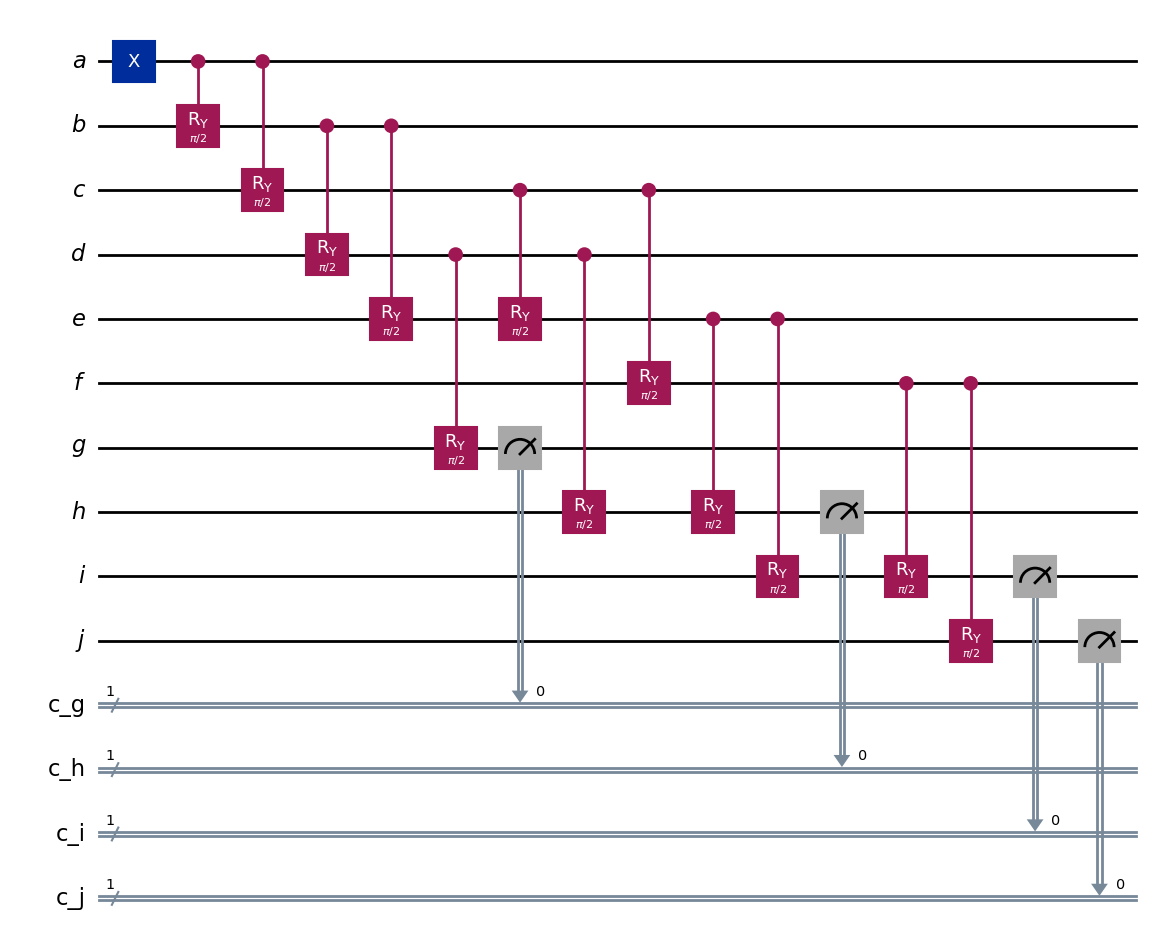

In [4]:
# d) with 4 endstates
# registers 
q_a, q_b, q_c, q_d, q_e, q_f, q_g, q_h, q_i, q_j = QuantumRegister(1, 'a'), QuantumRegister(1, 'b'), QuantumRegister(1, 'c'), QuantumRegister(1, 'd'), QuantumRegister(1, 'e'), QuantumRegister(1, 'f'),QuantumRegister(1, 'g'), QuantumRegister(1, 'h'),QuantumRegister(1, 'i'), QuantumRegister(1, 'j')

c_g, c_h, c_i, c_j = ClassicalRegister(1,'c_g'), ClassicalRegister(1,'c_h'), ClassicalRegister(1,'c_i'), ClassicalRegister(1,'c_j')

qc = QuantumCircuit(q_a, q_b, q_c, q_d, q_e, q_f, q_g, q_h, q_i, q_j,
                    c_g, c_h, c_i, c_j,
                    name='ABC_Galton')

# initial state |a b c> = |0 0 0> , so set A = 1, ball starts at the top
qc.x(q_a)

# --- fan‑outs, each child is conditioned on the parent beeing 1, when controlled gate by parent onto child
theta = np.pi/2              # 50‑50 split
qc.cry(theta, q_a[0], q_b[0])          # A -> B
qc.cry(theta, q_a[0], q_c[0])          # A -> C

qc.cry(theta, q_b[0], q_d[0])   # B → D
qc.cry(theta, q_b[0], q_e[0])   # B → E
qc.cry(theta, q_c[0], q_e[0])   # C → E
qc.cry(theta, q_c[0], q_f[0])   # C → F

qc.cry(theta, q_d[0], q_g[0])   # D → G
qc.cry(theta, q_d[0], q_h[0])   # D → H
qc.cry(theta, q_e[0], q_h[0])   # E → H
qc.cry(theta, q_e[0], q_i[0])   # E → I
qc.cry(theta, q_f[0], q_i[0])   # F → I
qc.cry(theta, q_f[0], q_j[0])   # F → J

#qc.measure_all()
qc.measure(q_g[0], c_g[0])
qc.measure(q_h[0], c_h[0])
qc.measure(q_i[0], c_i[0])
qc.measure(q_j[0], c_j[0])
qc.draw("mpl") # print with matplotlib


{'0 0 0 0': 4464, '0 0 0 1': 160, '1 1 0 0': 464, '0 0 1 1': 489, '0 1 0 0': 856, '0 0 1 0': 985, '1 1 1 0': 457, '0 1 1 0': 1293, '1 1 1 1': 178, '0 1 1 1': 501, '1 0 0 0': 153}


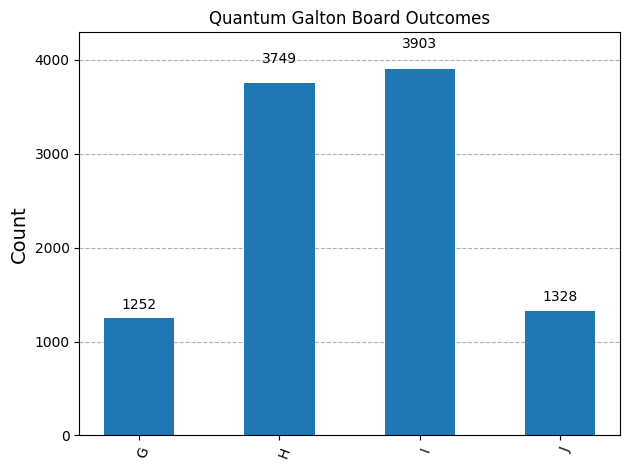

In [6]:
# measurement
from qiskit_aer import AerSimulator # accelerated emulator Runtime?
from qiskit import transpile
from qiskit.visualization import plot_histogram

simulator = AerSimulator()
transp = transpile(qc, simulator)

result = simulator.run(transp, shots=10000).result()
counts = result.get_counts(transp)

# need to read | b c a > , when inputting it like a,b,c into the qcircuit from qiskit
print(counts)  

def collapse_galton_outcomes(counts):
    outcome_counts = {'G': 0, 'H': 0, 'I': 0, 'J': 0}
    for key, value in counts.items():
        bits = key.replace(' ', '')  # e.g. "1 0 0" → "100"
        g, h, i, j = bits[0], bits[1], bits[2], bits[3]  #  g, h, i, j = bits[0], bits[1], bits[2], bits[3]
 
        # i guess we can just count, it somehow works, "impossible" results are thus ignored, e.g. 000
        if g == '1':
            outcome_counts['G'] += value
        if h== '1':
            outcome_counts['H'] += value
        if i == '1':
            outcome_counts['I'] += value
        if j == '1':
            outcome_counts['J'] += value

    return outcome_counts


galton = collapse_galton_outcomes(counts)


#plot_histogram(counts, title='Galton Board', color='blue', figsize=(10, 5))

plot_histogram(galton, title="Quantum Galton Board Outcomes") # should be approx 1/8, 3/8, 3/8, 1/8

e)
As we saw in the last 2 parts, for each pin in the galton board we need 1 qbit. for every edge we also need 1 Ry gate.
first level just a
2 levels: 3 
3 levels 6
4 levels 10
so little gauss [n(n+1)]/ 2

number of gates: n(n-1)
